In [2]:
import matplotlib.pyplot as plt


In [3]:
test_input ='''seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4'''

In [4]:

with open("fifth.txt", "r") as f:
    live_input = f.read()

In [5]:
def parse(input_str):
    return {x.split(':')[0].replace(' map', ''): [[int(z) for z in y.split()] for y in x.split(':')[1].strip().split('\n')] for x in input_str.split('\n\n')}

parsed_data = parse(live_input)
parsed_data
seeds = parsed_data['seeds'][0]
del parsed_data['seeds']
seeds

[4106085912,
 135215567,
 529248892,
 159537194,
 1281459911,
 114322341,
 1857095529,
 814584370,
 2999858074,
 50388481,
 3362084117,
 37744902,
 3471634344,
 240133599,
 3737494864,
 346615684,
 1585884643,
 142273098,
 917169654,
 286257440]

In [6]:
parsed_data['seed-to-soil']


[[1640984363, 3136305987, 77225710],
 [3469528922, 1857474741, 56096642],
 [278465165, 2901870617, 105516220],
 [1442950910, 1913571383, 198033453],
 [463085535, 1458252975, 13696838],
 [1718210073, 1686050230, 171424511],
 [383981385, 3064707638, 71598349],
 [1267048154, 3759577328, 175902756],
 [3262934306, 1479455614, 206594616],
 [2493001016, 200414015, 157177749],
 [3885112776, 411057950, 157348766],
 [4042461542, 1181162257, 199039568],
 [476782373, 2111604836, 790265781],
 [455579734, 1471949813, 7505801],
 [1889634584, 3213531697, 546045631],
 [4241501110, 357591764, 53466186],
 [3525625564, 3935480084, 359487212],
 [2650178765, 568406716, 612755541],
 [200414015, 1380201825, 78051150],
 [2435680215, 3007386837, 57320801]]

In [7]:
parsed_data['seed-to-soil']

def convert(map, input_value):
    for rule in map:
        rule_start = rule[1]
        rule_end = rule[1] + rule[2]
        off_set = rule[0] - rule[1]
        if input_value >= rule_start and input_value < rule_end:
            return input_value + off_set
    return input_value

order = ['seed-to-soil', 'soil-to-fertilizer', 'fertilizer-to-water', 'water-to-light', 'light-to-temperature', 'temperature-to-humidity', 'humidity-to-location']

def convert_chain(allmap, input_value):
    current = input_value
    for step in order:
        current = convert(allmap[step], current)
    return current


In [8]:
parsed_data.keys()

dict_keys(['seed-to-soil', 'soil-to-fertilizer', 'fertilizer-to-water', 'water-to-light', 'light-to-temperature', 'temperature-to-humidity', 'humidity-to-location'])

In [9]:
seeds
convert_chain(parsed_data, 79)

2519653027

In [10]:
min(convert_chain(parsed_data, seed)  for seed in seeds)

324724204

In [11]:
import tqdm

In [12]:
complex_seeds = set()
print('start complex seeds')
intervals = []
for idx in tqdm.tqdm(range(0,len(seeds), 2)):
    intervals.append((seeds[idx], seeds[idx]+seeds[idx+1]-1))
    # for actual_seed in range(seeds[idx], seeds[idx]+seeds[idx+1]):
    #     complex_seeds.add(actual_seed)
intervals
# final_complex_seeds = list(complex_seeds)

# print('start chain')

# min(convert_chain(parsed_data, seed)  for seed in tqdm.tqdm(final_complex_seeds))

start complex seeds


100%|██████████| 10/10 [00:00<00:00, 82727.89it/s]


[(4106085912, 4241301478),
 (529248892, 688786085),
 (1281459911, 1395782251),
 (1857095529, 2671679898),
 (2999858074, 3050246554),
 (3362084117, 3399829018),
 (3471634344, 3711767942),
 (3737494864, 4084110547),
 (1585884643, 1728157740),
 (917169654, 1203427093)]

In [13]:
def is_overlap(a, b):
    return a[0] < b[1] and b[0] < a[1]

In [14]:
for interval in intervals:
    for other_interval in intervals:
        if interval == other_interval:
            continue
        if is_overlap(interval, other_interval):
            print(interval, other_interval)

In [15]:
max([x[1] for x in intervals])

4241301478

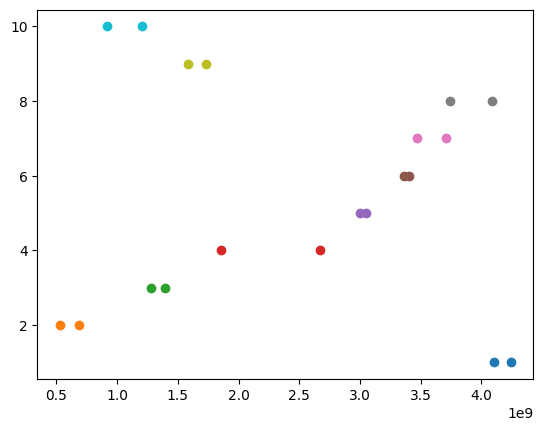

In [16]:

i = 1
for interval in intervals:
    step_number = 10
    step = int(interval[1] /step_number)
    plot_x_interval = []
    plot_y_interval = []
    step = int(interval[1]-interval[0] /step_number)
    for x in list(range(interval[0], interval[1], step))+[interval[1]]:
        plot_x_interval.append(x)
        plot_y_interval.append(i)
    plt.scatter(plot_x_interval, plot_y_interval)
    i += 1

In [17]:
actual_min = min(x[0] for x in intervals)
actual_min

529248892

In [18]:
actual_max = max(x[1] for x in intervals)

In [19]:
diff = actual_max - actual_min

In [20]:
step_number = 100000
step = int(diff /step_number)
step

37120

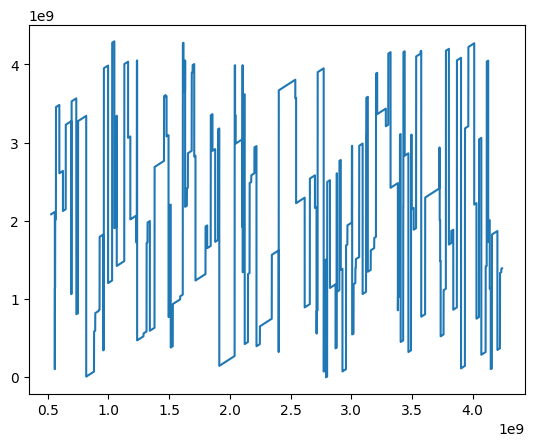

In [21]:
plot_x = []
plot_y = []
filtered_x = []
filtered_y = []
for x in list(range(actual_min, actual_max, step))+[actual_max]:


    yy = convert_chain(parsed_data, x)
    plot_x.append(x)
    plot_y.append(yy)
    for interval in intervals: 
        if x in range(interval[0], interval[1]+1):

            filtered_x.append(x)
            filtered_y.append(yy)

plt.plot(plot_x, plot_y)

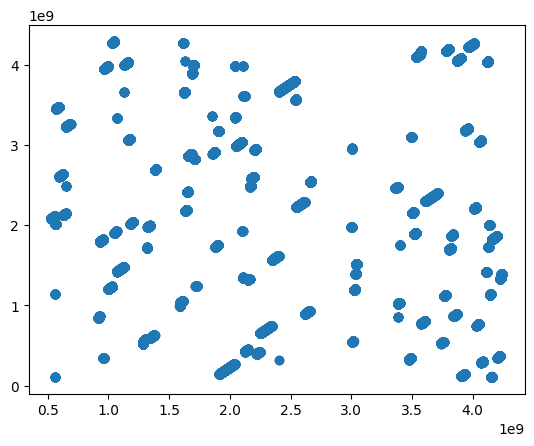

In [22]:

plt.scatter(filtered_x, filtered_y)

In [23]:
import pandas as pd

df = pd.DataFrame({'x': filtered_x, 'y': filtered_y})


In [24]:


step

37120

In [26]:
ddf = df.sort_values('y').head(50)

ddf['xx'] = ddf['x']- ddf.iloc[0].x
ddf['yy'] = ddf['y']- ddf.iloc[0].y

ddf




,x,y,xx,yy
815,559501692,104080767,0,0
816,559538812,104117887,37120,37120
817,559575932,104155007,74240,74240
818,559613052,104192127,111360,111360
819,559650172,104229247,148480,148480
820,559687292,104266367,185600,185600
821,559724412,104303487,222720,222720
822,559761532,104340607,259840,259840
823,559798652,104377727,296960,296960
824,559835772,104414847,334080,334080


In [27]:
ddf.iloc[0].x

559501692

In [28]:
step

37120

In [29]:
def in_solutions(x, intervals):
    for interval in intervals:
        if x in range(interval[0], interval[1]+1):
            return True
    return False

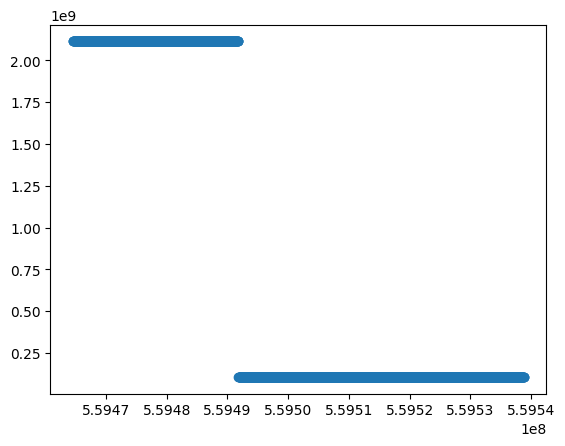

In [30]:

low_pointx = []
low_pointy = []
center = ddf.iloc[0].x
range_num = step


magic_step = int(range_num / 1000)
for x in list(range(center-range_num, center+range_num, magic_step))+[center+range_num]:

    if not in_solutions(x, intervals):
        continue
    yy = convert_chain(parsed_data, x)
    low_pointx.append(x)
    low_pointy.append(yy)

plt.scatter(low_pointx, low_pointy)


In [31]:
magic_x = low_pointx[low_pointy.index(min(low_pointy))]

In [32]:
magic_x

559491804

In [33]:
magic_step

37

In [34]:
min([convert_chain(parsed_data, x) for x in range(magic_x - magic_step, magic_x + magic_step)])

104070862

In [35]:
in_solutions(magic_x,intervals=intervals)

True